In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def park_miller(seed, start, end):
    a = (end - start) / 2147483947
    b = start
    while True:
        seed = (16807 * seed) % 2147483947
        yield  a * seed + b

In [4]:
rand = park_miller(10000, 0, 1000)

In [5]:
rand_ = [next(rand) for _ in range(10000)]

In [6]:
# Среднее время ожидания
middle_time = sum(rand_) / len(rand_)
print(
    f"""Ручное оценивание времени: {middle_time}
NumPy оценивание времени: {np.average(rand_)}"""
)

Ручное оценивание времени: 496.48023207257995
NumPy оценивание времени: 496.48023207257995


In [7]:
# Дисперсия
variance = sum([(x - middle_time) ** 2 for x in rand_]) / len(rand_)
print(
    f"""Ручная дисперсия: {variance}
NumPy дисперсия: {np.var(rand_)}"""
)

Ручная дисперсия: 84076.85348199081
NumPy дисперсия: 84076.85348199081


In [8]:
deviation = variance ** .5
print(
    f"""Ручное Ср. отклонение: {deviation}
NumPy Ср. отклонение: {np.std(rand_)}"""
)

Ручное Ср. отклонение: 289.96008946403435
NumPy Ср. отклонение: 289.96008946403435


<Axes: title={'center': 'Basic Histogram'}, xlabel='Values', ylabel='Frequency'>

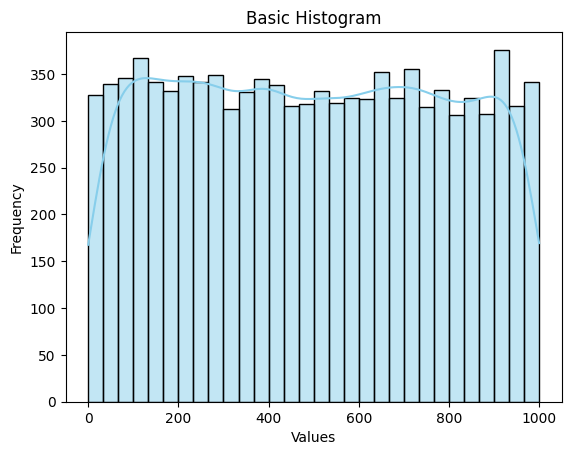

In [9]:
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

#plt.hist(rand_, bins=30, color='skyblue', edgecolor='black')
sns.histplot(rand_, bins=30, kde=True, color='skyblue', edgecolor='black')

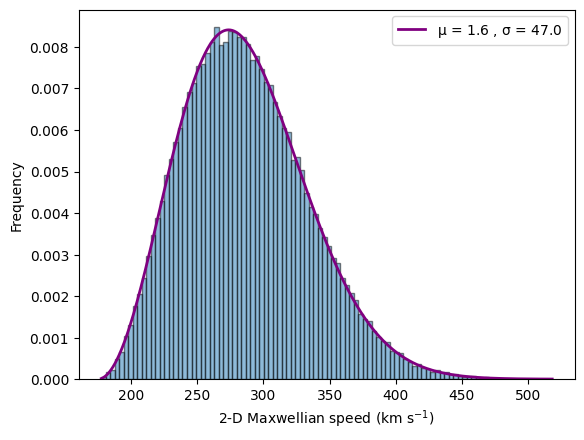

In [10]:
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import random
import numpy as np
import scipy.optimize
from scipy.stats import maxwell

samplesize = 100000

mean = 307
sigma = 47
loc = 175 
a_value = np.sqrt((sigma**2 * math.pi)/(3*math.pi - 8))


fig, axs = plt.subplots(1)
v_2d = maxwell.rvs(loc, a_value, size=samplesize) 
mean, var, skew, kurt = maxwell.stats(moments='mvsk')

N, bins, patches = plt.hist(v_2d, bins=100, density=True, alpha=0.5, histtype='bar', ec='black')
maxx = np.linspace(min(v_2d), max(v_2d), samplesize)

axs.plot(
	maxx, 
	maxwell.pdf(maxx, loc, a_value), 
	color='purple', 
	lw=2, 
	label= r'$\mathdefault{\mu}$ = '+'{:0.1f}'.format(mean) + \
		r' , ' + \
		r'$\mathdefault{\sigma}$ = ' + \
		'{:0.1f}'.format(sigma)
)

axs.set(xlabel=r'2-D Maxwellian speed (km s$^{-1}$)')
axs.set(ylabel='Frequency')
plt.legend(loc='upper right')

In [11]:
σ = 47
μ = 307

a = σ * np.sqrt(np.pi/(3.0*np.pi - 8.0))
print(a)

m = 2.0*a*np.sqrt(2.0/np.pi)
print(m)

loc = μ - m
print(loc)

print("----------Now test--------------------")

q = maxwell.rvs(loc=loc, scale=a, size=100000)

print(np.mean(q))
print(np.std(q))

69.79096445684834
111.37026604732166
195.62973395267835
----------Now test--------------------
306.8916894835387
47.01951866096937


<Axes: ylabel='Count'>

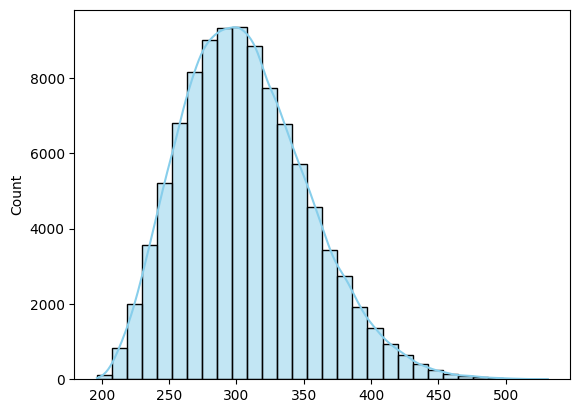

In [12]:
sns.histplot(q, bins=30, kde=True, color='skyblue', edgecolor='black')

In [30]:
R = 6
H = 4

print(f'Радиус: {R}')
print(f'Высота: {H}')

N = 10 ** 6

V_ = 4 * R ** 2 * (H * R)

#counter = 0
#for i in range(N):
#	x = (2 * i * R) / (N - R)
#	for j in range(N):
#		y = (2 * j * R) / (N - R)
#		for k in range(N):
#			z = (k * (N + R)) / N
#			if ((((x ** 2 + y ** 2) / R) ** .5 <= z / H) and (z <= H)) or \
#				(((x ** 2 + y ** 2 + (z - H) ** 2) <= R ** 2) and (z > H)):
#				counter += 1
	
counter = 0
for _ in range(N):
	
	x = random.uniform(-10, 10)
	y = random.uniform(-10, 10)
	z = random.uniform(-10, 10)

	if ((((x ** 2 + y ** 2) / R) ** .5 <= z / H) and (z <= H)) or \
		(((x ** 2 + y ** 2 + (z - H) ** 2) <= R ** 2) and (z > H)):
			counter += 1

V = (V_ * counter) / (N + 1) ** 3
print(((math.pi * R ** 2 * H) / 3) + (4 * math.pi * R ** 3) / 3)

print(((N - counter) / (N * counter)) ** .5) 



Радиус: 6
Высота: 4
1055.5751316061705
0.003976904130430525
